# Dijkstra

Import libraries

In [1]:
import importlib
from or_algorithms import dijkstra as djks
importlib.reload(djks)
print()

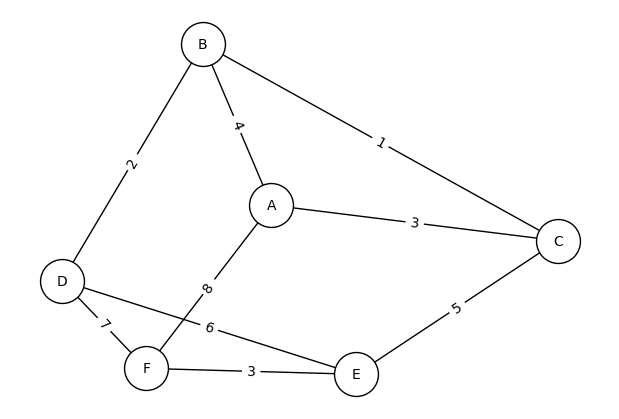

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()

# Add edges with weights
edges = [
    ("A", "B", 4), ("A", "C", 3), ("B", "C", 1), ("B", "D", 2),
    ("C", "E", 5), ("D", "E", 6), ("D", "F", 7), ("E", "F", 3),
    ("A", "F", 8)  # Adding more complexity
]

# Add edges to the graph
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Get edge weights
edge_labels = {(u, v): w for u, v, w in edges}

# Draw the graph
plt.figure(figsize=(6, 4))
nx.draw(
    G, pos, with_labels=True, node_color="white", edge_color="black",
    node_size=1000, font_size=10, edgecolors="black", linewidths=1 
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Show the plot
plt.show()